# Difference between means
by Tonatiuh Rangel

Here I discuss how to make hypothesis tests for the difference between means.

Several parametric methods are proposed:    

1. [Parametric](#parametric)    
    1.1 [t-test](#t-test)   
    1.2 [Scipy's t-test](#scipy-t-test)   
    1.3 [Cohen's d](#cohens-d)   
2. [Bootstrapping](#bootstrapping)



<a id='parametric'></a>
# Parametric tests.

<a id='t-test'></a>
## t-test

### Assumptions:
1. two independent random samples   
2. each drawn from a normally distributed population  

### Hypothesis
|Set|	Null hypothesis	| Alternative hypothesis |No. of tails |
|---|:-----------------:|:----------------------:|:-----------:|
|1	| $\mu_1 - \mu_2 = d$ | $\mu_1 - \mu_2 \neq d$ |	2|
|2	| $\mu_1 - \mu_2 > d$ | $\mu_1 - \mu_2 < d$ | 1|
|3	| $\mu_1 - \mu_2 < d$ | $\mu_1 - \mu_2 > d$ | 1|

with $d$ being the difference between the two means.

### Test method

We will use the ** t-test ** method.   

Steps:   

Given two samples of size $n_1$ and $n_2$ and standard deviation $s_1$ and $s_2$, respectively, calculate the following:   

#### Standard error (SE):   
SE $ = \sqrt{ (s_1^2/n_1) + (s_2^2/n_2) }$


#### Degrees of freedom (DF):   
DF $ = \frac{( s_1^2/n_1 + s_2^2/n_2)^2 } {  (s_1^2 / n_1)^2 / (n_1 - 1)  + (s_2^2 / n_2)^2 / (n_2 - 1)  }$


#### Test statistic:   
$t = \frac{ (x1 - x2) - d  }{ \textrm{SE}}$


**Note** If the population standard deviations ($\sigma_1$ and $\sigma_2$) are known, or if both sample sizes are 30 or larger (the central limit theorem is in effect), the test statistic is 

$z = \frac{ (\mu_1 - \mu_2) - d  }{ \textrm{SE}}$ ; SE $ = \sqrt{ (\sigma_1^2/n_1) + (\sigma_2^2/n_2) }$


Further reading:   
[kean.edu](http://www.kean.edu/~fosborne/bstat/07b2means.html)   
[stattrek.com](http://stattrek.com/hypothesis-test/difference-in-means.aspx?Tutorial=AP#) 

<a id='numerical-example'></a>
### Numerical example

Let's test if two normal distributions have different means.   

Here I build sample normal distributions (sample1 and sample2) using numpy's random.normal function.   

In [1]:
import numpy as np
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Let's construct two samples normally distributed with a given mean (mu) and standard deviations (std).   
sample_size=3000

mu = 1.0; std = 2.0;
sample1 = np.random.normal(loc=mu, scale=std, size=sample_size)
mu1 = sample1.mean(); std1 = sample1.std(); n1=len(sample1)
print("Sample 1: mean = {}, std ={}".format(mu1,std1))

mu = 1.15; std=2.0;
sample2 = np.random.normal(loc=mu, scale=std, size=sample_size)
mu2 = sample2.mean(); std2 = sample2.std(); n2=len(sample2)
print("Sample 2: mean = {}, std ={}".format(mu2,std2))

Sample 1: mean = 0.9872038631644976, std =1.970787925325931
Sample 2: mean = 1.1255675330891828, std =2.018855325815162


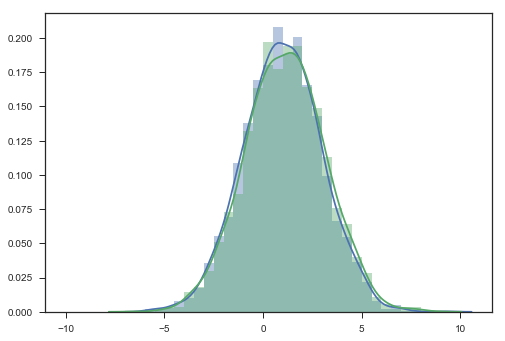

In [2]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
#df = sns.load_dataset("anscombe")

bins = np.arange(-10,10,0.5)

# Show the results of a linear regression within each dataset
ax1 = sns.distplot(sample1,bins=bins)
ax2 = sns.distplot(sample2,bins=bins)

plt.pyplot.show()

### Are the two distribution means significantly different?

Null hypothesis    
$\mathcal{H}_0$ : $ \mu_1 - \mu_2 = 0$    

Alternative hypothesis   
$\mathcal{H}_1$ : $ \mu_1 - \mu_2 \neq 0$   

This is a two-tailed test.   
significance $\alpha = 0.05$

Compute the t-statistic.

In [3]:
# Standard error
SE = np.sqrt(std1**2/n1 + std2**2/n2)
print("SE = {}".format(round(SE,3)))

SE = 0.052


In [4]:
# Degrees of freedom:
denominator=((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))
DF = (std1**2/n1 + std2**2/n2)**2/denominator
print("DF = {}".format(int(DF)))


DF = 5994


In [5]:
# test-statistic
TestStatistic = (mu1 - mu2)/SE
print("t-statistc = {}".format(round(TestStatistic,3)))


t-statistc = -2.686


Since this is a two-tailed function, we need to test that:   
$P = P( x < t) + P( x > t ) < \alpha$     

Since $P ( x < t) = P(x > t$,   
$P = 2 P( x < t)$   
where $t$ is our test-statistic

Note we use significance $\alpha =0.05$    

In [6]:
from scipy import stats
pvalue = 2* stats.t.cdf(TestStatistic, DF)
# Multiply by two, since this is two-tailed test

printmd('t-score {}'.format(round(TestStatistic,2)))
print("p-value = {}".format(round(pvalue,3)))

t-score -2.69

p-value = 0.007


Our p-value is smaller than our significance value of 0.05, then we **reject** the null-hypothesis.


<a id='scipy-t-test'></a>
## Scipy's t-test
t-test is also implemented in scipy.

In [7]:
twosample_results = stats.ttest_ind(sample1, sample2)
TestStatistic = twosample_results[0]
pvalue = twosample_results[1]

printmd('t-score {}'.format(round(TestStatistic,2)))
printmd('p-value {}'.format(round(pvalue,4)))

t-score -2.69

p-value 0.0073

These results agree with previous findings. Hence, we cannot reject the null hypothesis (see above).





<a id='cohens-d'></a>
## Cohen's d  

Cohen's d is a statistical measure to indicate effect size. An effect size is how large an effect of an experiment (or something) is. This is used along with ANOVA or t-tests.  

The formula of Cohen's d is:

$d = (\mu_1 - \mu_2)/s_\textrm{pooled}$

$s_\textrm{pooled}$ is the pooled standard deviation for two groups,    
$s_\textrm{pooled} = \sqrt{(s_1^2 + s_2^2)/2}$

Interpretation:
The Cohen's d value is used to evaluate the effect size, but use this cautiosly,   

* Small effect = 0.2
* Medium effect = 0.5
* Large effect $\geq$ 0.8

In terms of $r$, the suggested corresponding values are 0.10, 0.30, and 0.50.   

To transform $d$ into the correlation coefficient $r$,   
$r = \frac{d}{\sqrt{d^2 + 4}}$

Note that Cohen's d is similar to the Hedges'g, which is also used to estimate the effect size,   
$g = \frac{d}{\sqrt{N/\textrm{DF}}}$   
with $N=$ sample size, and degrees of freedom DF.  


Further reading:   
http://www.statisticshowto.com/hedges-g/   
http://www.statisticshowto.com/cohens-d/


References:   
* Cohen, J. (1977). Statistical power analysis for the behavioral sciences. Routledge.
* Durlak, J. (2009) How to Select, Calculate, and Interpret Effect Sizes. Journal of Pediatric Psychology. March: 34(9):917-28.

### Numerical example

Let's evaluate the Cohen's d value for our numerical example (see [above](#numerical-example)). 

This metric will tell us how different are the two distributions in terms of standard deviations   

In [8]:
# Evaluate Cohen's d  
pooled_std = ((std2**2 + std1**2)/2.0)**0.5
d = (mu2 - mu1)/pooled_std

print('Cohen\'s d {}'.format(round(d,2)))

Cohen's d 0.07


The Cohen's d is < 0.2, hence the two samples have a very small difference (small effect size).   

<a id='bootstrapping'></a>
## Bootstrapping

In [9]:
from sklearn.utils import shuffle

#Use same distributions as above:
n1=len(sample1)
n2=len(sample2)

#Mege two samples:
sample = np.concatenate((sample1,sample2))
sample_size = len(sample)

# Set number of bootstrapping random re-samples:
resamples = 10000 #needs to be converged

# Here we will accumulate mean values for all samples:
mean_diffs = []
for resample in range(resamples):
    #boot = shuffle(sample) # Randomnly shuffle array
    boot = np.random.choice(sample,sample_size,replace=True) #bootstrapping draws with replacement

    # Split samples for this resampling, 
    # set size equal to the original sample1 and sample2 sizes (n1, n2).
    boot1 = boot[:n1]
    boot2 = boot[n1:]
    # mean absolute differences
    mean_diff = abs(boot1.mean() - boot2.mean())
    mean_diffs.append(mean_diff)
    
#convert to numpy array
mean_diffs = np.array(mean_diffs)

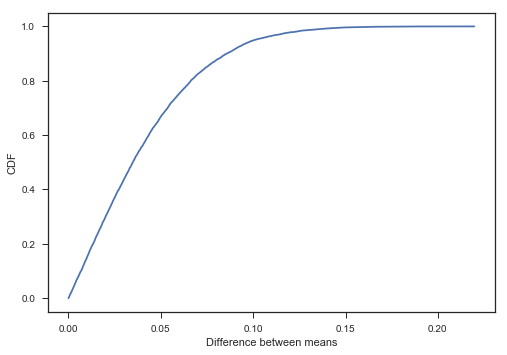

In [10]:
# Compute CDF function:

# sort the data:
data = mean_diffs
data_sorted = np.sort(data)

# calculate the proportional values of samples
p = 1. * np.arange(len(data)) / (len(data) - 1)

plt.pyplot.plot(data_sorted,p)
plt.pyplot.xlabel('Difference between means')
plt.pyplot.ylabel('CDF')


In [11]:
# Use the above example to make a routine that will return 
# the probability for give sample x.
def get_p_value(x,data):
    """Returns the p value for a given sample x
    1. Builds CDF for a given distribution
    2. Evaluates P(x) for the CDF"""
    
    data_sorted = np.sort(data)
    n = len(data_sorted)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    
    # Evaluate the position of x in the distribution of sorted data:
    # This is done in a naive way here:
    ix = 0
    while (( x > data_sorted[ix]) and ( ix < n-1 )): 
        ix = ix + 1
        
    return p[ix]

In [12]:
# Test the probability of the difference between means of samples 1 and 2:
mean_diff = abs(sample1.mean() - sample2.mean())
p_value = 1.0 - get_p_value(mean_diff,mean_diffs)
print('The difference between means is {}'.format(round(mean_diff,3)))
print("This event has a p-value of {}".format(round(p_value,6)))

The difference between means is 0.138
This event has a p-value of 0.008401


Again, in agreement with the t-test above, the p-value is smaller than a significance of 0.05. Hence, we reject the null-hypothesis.